In [138]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import imageio,io
import pydotplus

In [61]:
result = pd.read_csv('data/Travel_Survey_Compressed.csv', sep=',')
result.head()

Main Reason to Travel  \
0      To relax and escape work and responsibilities   
1  To see the wonders of nature; To spend quality...   
2  To meet new people; To see the wonders of natu...   
3  To meet new people; To see the wonders of natu...   
4  To learn more about a language or a culture; T...   

  Most Important Factor for Trip Planning  \
0                Aesthetic of destination   
1                                  Budget   
2    Variety of activities at destination   
3                                  Budget   
4    Variety of activities at destination   

                                   Favorite Activity  \
0                               Beach; Explore; Food   
1                               Food; Watch Football   
2                            Food; Meet Locals; City   
3  Road Trip; Beach; Swim; Island; Boat; Shop; Fo...   
4                                   Christmas Market   

                   Most Appealing Destination  Ideal Group Size  Gender  \
0                 A relaxing day at the beach                 2  Female   
1  An overnight backpacking trip on a volcano                 4    Male   
2                 A relaxing day at the beach                 3  Female   
3       A hang gliding ride over a lush field                 4  Female   
4   An old city with interesting architecture                 4  Female   

  Student  Openness  Conscientiousness  Extraversion  Agreeableness  \
0      No         6                  2             6              6   
1     Yes         3                  6             3              5   
2     Yes         6                  4             7              6   
3     Yes         6                  2             6              5   
4     Yes         7                  6             4              6   

   Neuroticism         Recommendation  
0            3      Carribean Islands  
1            2       Argentina/Brazil  
2            2       Argentina/Brazil  
3            3  Australia/New Zealand  
4            4        Austria/Germany

In [62]:
f = open('data/Travel_Survey_Data.csv', 'w')
with open('data/Travel_Survey_Compressed.csv', 'r') as r:
    for ln in r:
        ln_li = ln.replace("\n", "").replace("\ufeff","").split(',')
        for i in ln_li[0].split(";"):
            for j in ln_li[2].split(";"):
                new_ln = i + "," + ln_li[1] + "," + j.lstrip() + ","
                new_ln += ln.split(",", 3)[3] + "\n"
                new_ln = new_ln.replace("\n\n", "\n")
                #print(new_ln)
                f.write(new_ln.lstrip())
result_filtered = pd.read_csv('data/Travel_Survey_Data.csv', sep=',')

In [63]:
dest_list = result["Recommendation"].tolist()
dest_li_unique = list(dict.fromkeys(dest_list))
#print(dest_li_unique, len(dest_li_unique))

In [65]:
#favorite activity encoding
activity_list = result_filtered["Favorite Activity"].tolist()
activity_list = list(dict.fromkeys(activity_list))
#print(activity_list)

#reason to travel encoding
reason_list = result_filtered["Main Reason to Travel"].tolist()
reason_list = list(dict.fromkeys(reason_list))

#important factor encoding
factor_list = result_filtered["Most Important Factor for Trip Planning"].tolist()
factor_list = list(dict.fromkeys(factor_list))

#appealing destination encoding
appeal_list = result_filtered["Most Appealing Destination"].tolist()
appeal_list = list(dict.fromkeys(appeal_list))

# new csv
fw = open("data/Travel_Survey_Data_Encoded_DecisionTree.csv", "w")
fw.write("Recommendation,Ideal Group Size,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,is_student,is_male,is_female,is_non_binary,")

en_text_list = ""
for act in reason_list + factor_list + activity_list + appeal_list:
    en_name = "is_" + act.replace(" ", "_").lower()
    en_text_list += en_name + ","
#print(en_text_list[:-1])
fw.write(en_text_list[:-1] + "\n")
#fw.close()

with open('data/Travel_Survey_Compressed.csv', 'r') as fr:
    for ln in fr:
        if "Recommendation" in ln:
            pass
        else:
            li = ln.lower().split(",")
            reason = li[0]
            factor = li[1]
            activity = li[2]
            appeal = li[3]
            gp_size = li[4]
            gender = li[5]
            student = li[6]
            op, con, ext, agr, neu = li[7:12]
            rec = li[12].replace("\n", "").title()
            
            row = rec + "," + gp_size + "," + op + "," + con + "," + ext + "," + agr + "," + neu + ","
            if student.strip().lower() == "yes":
                row += "1,"
            else:
                row += "0,"
            if gender.strip().lower() == "male":
                row += "1,"
            else:
                row += "0,"
            if gender.strip().lower() == "female":
                row += "1,"
            else:
                row += "0,"
            if gender.strip().lower() == "non_binary":
                row += "1,"
            else:
                row += "0,"
            
            #reason
            for i in reason_list:
                if i.lower() in reason:
                    row += "1,"
                else:
                    row += "0,"
                    
            #factor
            for i in factor_list:
                if i.lower() in factor:
                    row += "1,"
                else:
                    row += "0,"
                    
            #activity
            for i in activity_list:
                if i.lower() in activity:
                    row += "1,"
                else:
                    row += "0,"
                    
            #appeal
            for i in appeal_list:
                if i.lower() in appeal:
                    row += "1,"
                else:
                    row += "0,"
                    
            fw.write(row[:-1] + "\n")
fw.close()

In [66]:
#from sklearn.preprocessing import OneHotEncoder

#enc = OneHotEncoder(handle_unknown='ignore')
#enc.fit(result_filtered, "Recommendation")
#enc.categories_

data = pd.read_csv("data/Travel_Survey_Data_Encoded_DecisionTree.csv", sep=",")
data.head()

Recommendation  Ideal Group Size  Openness  Conscientiousness  \
0      Carribean Islands                 2         6                  2   
1       Argentina/Brazil                 4         3                  6   
2       Argentina/Brazil                 3         6                  4   
3  Australia/New Zealand                 4         6                  2   
4        Austria/Germany                 4         7                  6   

   Extraversion  Agreeableness  Neuroticism  is_student  is_male  is_female  \
0             6              6            3           0        0          1   
1             3              5            2           1        1          0   
2             7              6            2           1        0          1   
3             6              5            3           1        0          1   
4             4              6            4           1        0          1   

   ...  is_pub  is_tubing  is_motorcycle  is_cooking_class  \
0  ...       0          0              0                 0   
1  ...       0          0              0                 0   
2  ...       0          0              0                 0   
3  ...       0          0              0                 0   
4  ...       0          0              0                 0   

   is_a_relaxing_day_at_the_beach  \
0                               1   
1                               0   
2                               1   
3                               0   
4                               0   

   is_an_overnight_backpacking_trip_on_a_volcano  \
0                                              0   
1                                              1   
2                                              0   
3                                              0   
4                                              0   

   is_a_hang_gliding_ride_over_a_lush_field  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   is_an_old_city_with_interesting_architecture  is_an_all-inclusive_resort  \
0                                             0                           0   
1                                             0                           0   
2                                             0                           0   
3                                             0                           0   
4                                             1                           0   

   is_a_big_metropolitan_city  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 169 columns]

In [67]:
##### DECISION TREE

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

train, test = train_test_split(data,test_size=0.15)

c = DecisionTreeClassifier()
features = ["Ideal Group Size","Openness","Conscientiousness","Extraversion","Agreeableness","Neuroticism","is_student","is_male","is_female","is_non_binary","is_to_relax_and_escape_work_and_responsibilities","is_to_see_the_wonders_of_nature","is_to_spend_quality_time_with_family/friends","is_to_look_at_and_appreciate_beautiful_places","is_to_share_travel_stories_and_view_with_friends_and_family_back_home","is_to_meet_new_people","is_to_learn_more_about_a_language_or_a_culture","is_to_go_on_an_adventure","is_to_explore_architecture_and_history","is_work_or_business","is_food","is_discover_new_cuisines","is_art_and_energy","is_art_museums/galleries","is_to_climb","is_aesthetic_of_destination","is_budget","is_variety_of_activities_at_destination","is_proximity_to_nature","is_proximity_to_other_destinations","is_time","is_travel_group_size","is_variety_of_activities_at_destination_but_more_specifically_what_climbing_is_in_that_area","is_safety","is_overall_quality_of_general_experience","is_beach","is_explore","is_food","is_watch_football","is_meet_locals","is_city","is_road_trip","is_swim","is_island","is_boat","is_shop","is_camp","is_kayak","is_zoo","is_skydive","is_tattoo","is_visit_surrounding_areas","is_hike","is_christmas_market","is_ski","is_sightsee","is_relax","is_walk","is_sunset","is_stargaze","is_concert","is_theatre","is_snowboard","is_friends","is_temple","is_culture","is_snowshoe","is_sauna","is_party","is_bike","is_run","is_cafes","is_view","is_sky_terrace","is_skyscraper","is_architecture","is_dance_workshops","is_tourist_attractions","is_family","is_surf","is_animals","is_cruise","is_scuba_dive","is_bars","is_museum","is_clubbing","is_snorkel","is_wildlife","is_vegetation","is_farm","is_islands","is_history","is_cinema","is_road_trips","is_art_gallery","is_nightlife","is_science_center","is_countryside","is_photography","is_pool","is_helicopter_ride","is_nature","is_volunteer","is_drive","is_waterfalls","is_rivers","is_climb","is_glacier","is_cook","is_gelato","is_ocean","is_sunbath","is_tan","is_boat_trip","is_wine_tasting","is_cycle","is_landmarks","is_churches","is_rural_heritage","is_transit","is_safari","is_desert","is_bedouin_camp","is_market","is_safaris","is_street_food","is_festival","is_bar","is_karaoke","is_golf","is_sandboard","is_extreme_sports","is_camel_ride","is_landscapes","is_broadway","is_park","is_northern_lights","is_snow_hike","is_tea","is_mountains","is_banana_plantation","is_sulfur_spring","is_waterfall","is_mud_bath","is_vineyards","is_zip_line","is_landmark","is_seaside","is_old_town","is_sunshine","is_un_headquarter","is_cottage","is_chocolae_factory","is_school","is_chill","is_shows","is_university","is_sport_venues","is_pub","is_tubing","is_motorcycle","is_cooking_class","is_a_relaxing_day_at_the_beach","is_an_overnight_backpacking_trip_on_a_volcano","is_a_hang_gliding_ride_over_a_lush_field","is_an_old_city_with_interesting_architecture","is_an_all-inclusive_resort","is_a_big_metropolitan_city"]

x_train = train[features]
y_train = train['Recommendation']

x_test = test[features]
y_test = test['Recommendation']
c.fit(x_train, y_train)

DecisionTreeClassifier()

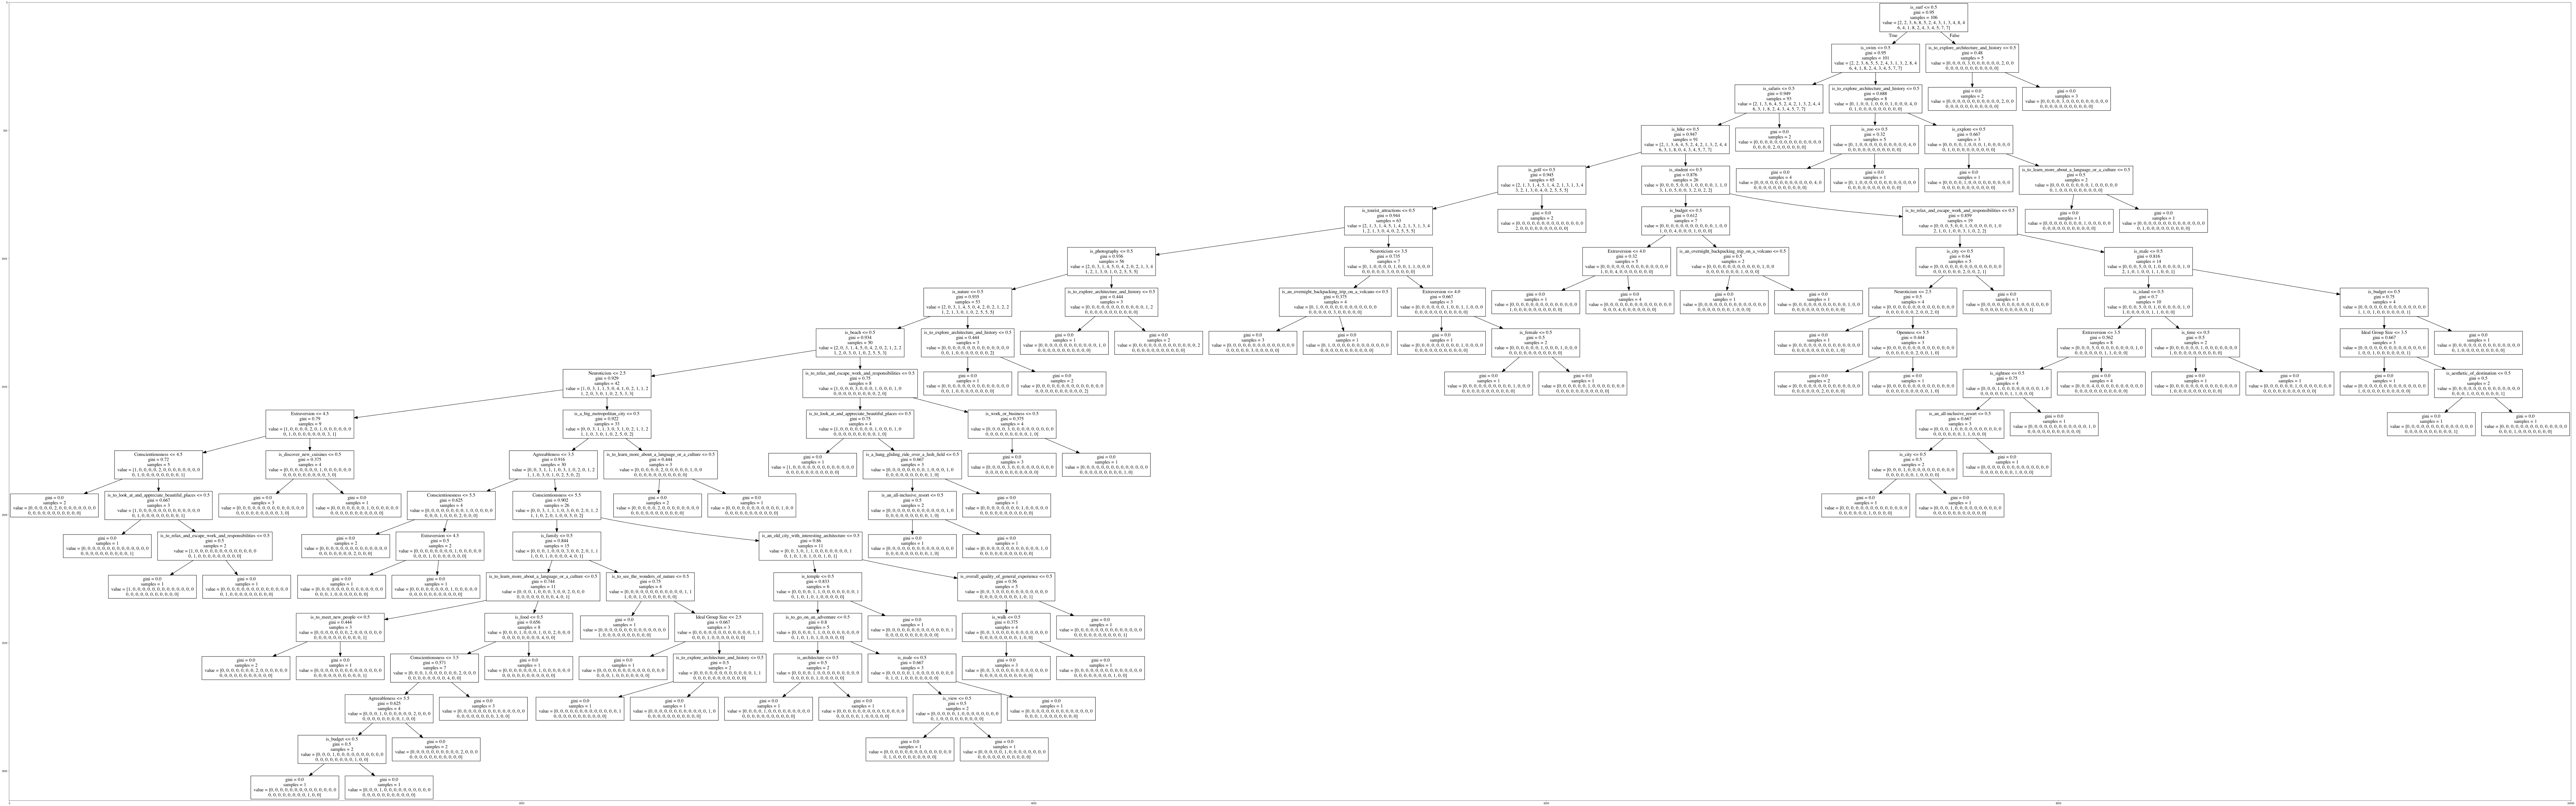

In [68]:
def show_tree(tree,features,path):
  f = io.StringIO()
  export_graphviz(tree,out_file=f,feature_names=features)
  pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
  img = imageio.imread(path)
  plt.rcParams['figure.figsize'] = (200,200)
  plt.imshow(img)
show_tree(c,features,'decision_tree')

In [70]:
y_pred = c.predict(x_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)*100
print("Accuracy using Decision Tree: ",score)

Accuracy using Decision Tree:  5.263157894736842


In [134]:
##### LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

x = data.drop('Recommendation', axis=1)
x = x.drop(['is_male', 'is_swim'], axis=1)
x.head()

Ideal Group Size  Openness  Conscientiousness  Extraversion  Agreeableness  \
0                 2         6                  2             6              6   
1                 4         3                  6             3              5   
2                 3         6                  4             7              6   
3                 4         6                  2             6              5   
4                 4         7                  6             4              6   

   Neuroticism  is_student  is_female  is_non_binary  \
0            3           0          1              0   
1            2           1          0              0   
2            2           1          1              0   
3            3           1          1              0   
4            4           1          1              0   

   is_to_relax_and_escape_work_and_responsibilities  ...  is_pub  is_tubing  \
0                                                 1  ...       0          0   
1                                                 0  ...       0          0   
2                                                 1  ...       0          0   
3                                                 1  ...       0          0   
4                                                 0  ...       0          0   

   is_motorcycle  is_cooking_class  is_a_relaxing_day_at_the_beach  \
0              0                 0                               1   
1              0                 0                               0   
2              0                 0                               1   
3              0                 0                               0   
4              0                 0                               0   

   is_an_overnight_backpacking_trip_on_a_volcano  \
0                                              0   
1                                              1   
2                                              0   
3                                              0   
4                                              0   

   is_a_hang_gliding_ride_over_a_lush_field  \
0                                         0   
1                                         0   
2                                         0   
3                                         1   
4                                         0   

   is_an_old_city_with_interesting_architecture  is_an_all-inclusive_resort  \
0                                             0                           0   
1                                             0                           0   
2                                             0                           0   
3                                             0                           0   
4                                             1                           0   

   is_a_big_metropolitan_city  
0                           0  
1                           0  
2                           0  
3                           0  
4                           0  

[5 rows x 166 columns]

In [142]:
y_li = pd.get_dummies(data['Recommendation'])
y_li.head()

Argentina/Brazil  Australia/New Zealand  Austria/Germany  \
0                 0                      0                0   
1                 1                      0                0   
2                 1                      0                0   
3                 0                      1                0   
4                 0                      0                1   

   Canada/Iceland/Russia  Carribean Islands  China/Taiwan  Colombia/Ecuador  \
0                      0                  1             0                 0   
1                      0                  0             0                 0   
2                      0                  0             0                 0   
3                      0                  0             0                 0   
4                      0                  0             0                 0   

   Czech Republic/Hungary  Egypt/Jordan/Lebanon  France  ...  \
0                       0                     0       0  ...   
1                       0                     0       0  ...   
2                       0                     0       0  ...   
3                       0                     0       0  ...   
4                       0                     0       0  ...   

   Morocco/Tunisia/Senegal  Netherlands  Pakistan/India/Nepal  \
0                        0            0                     0   
1                        0            0                     0   
2                        0            0                     0   
3                        0            0                     0   
4                        0            0                     0   

   South Africa/Kenya/Namibia  Spain/Portugal  Sweden/Norway  Switzerland  \
0                           0               0              0            0   
1                           0               0              0            0   
2                           0               0              0            0   
3                           0               0              0            0   
4                           0               0              0            0   

   United Kingdom/Ireland  United States  Vietnam/Cambodia/Thailand  
0                       0              0                          0  
1                       0              0                          0  
2                       0              0                          0  
3                       0              0                          0  
4                       0              0                          0  

[5 rows x 25 columns]

In [143]:
for col in y_li:
    y = y_li[col]
    y_flat = np.ravel(y)
    log_model = LogisticRegression()
    log_model.fit(x, y_flat)
    #print(col, log_model.score(x, y_flat), log_model.decision_function(x)[0])

In [149]:
lr = LogisticRegression()
y = np.ravel(data['Recommendation'])
x_tr, x_te = train_test_split(x, test_size=0.2)
y_tr, y_te = train_test_split(y, test_size=0.2)

lr.fit(x_tr, y_tr)
y_pr = lr.predict(x_te)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test,y_pred)*100
print("Accuracy using LogReg: ",score)

Accuracy using LogReg:  5.263157894736842
